<a href="https://colab.research.google.com/github/navidyamini/TensorFlow2.0_Codes/blob/main/code/TF2_0_Autoregressive_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

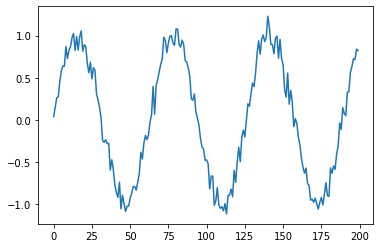

In [2]:
# make the original data
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1

# plot it
plt.plot(series)
plt.show()

In [3]:
### build the dataset
# let's see if we can use T past values to predict the next value
T = 10
X = []
Y = []
for t in range(len(series) - T ):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (190, 10) Y.shape (190,)


In [4]:
### try autoregressive liner model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.1)
)
# train the RNN
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 1s 204ms/step - loss: 1.3626 - val_loss: 0.2971
Epoch 2/80
3/3 [==============================] - 0s 31ms/step - loss: 0.5046 - val_loss: 0.9086
Epoch 3/80
3/3 [==============================] - 0s 27ms/step - loss: 0.6275 - val_loss: 0.2705
Epoch 4/80
3/3 [==============================] - 0s 42ms/step - loss: 0.1263 - val_loss: 0.1724
Epoch 5/80
3/3 [==============================] - 0s 32ms/step - loss: 0.2654 - val_loss: 0.2298
Epoch 6/80
3/3 [==============================] - 0s 30ms/step - loss: 0.1651 - val_loss: 0.0467
Epoch 7/80
3/3 [==============================] - 0s 37ms/step - loss: 0.0413 - val_loss: 0.0809
Epoch 8/80
3/3 [==============================] - 0s 23ms/step - loss: 0.1212 - val_loss: 0.0809
Epoch 9/80
3/3 [==============================] - 0s 46ms/step - loss: 0.0638 - val_loss: 0.0317
Epoch 10/80
3/3 [==============================] - 0s 29ms/step - loss: 0.0375 - val_loss: 0.0696
Epoch 11/80
3/3 [======================

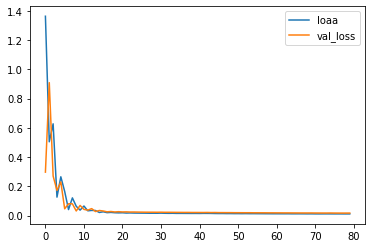

In [5]:
# plot loss per iteration
plt.plot(r.history['loss'], label='loaa')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [6]:
# "Wrong forecast using true targets"

validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1))[0,0] # 1X1 array -> scalar
  i += 1

  # update the predictions list
  validation_predictions.append(p)

1/1 [==============================] - 0s 17ms/step


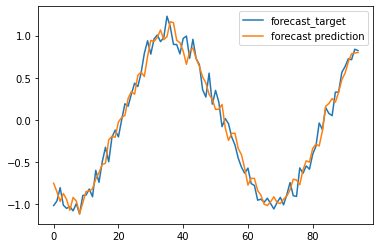

In [7]:
plt.plot(validation_target, label='forecast_target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [8]:
# Forecast future values (use only self-predictions for making future predictions)

validation_target = Y[-N//2:]
validation_predictions = []

# last train input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0,0] # 1x1 array -> scalar

  # update the predictions list
  validation_predictions.append(p)

  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

1/1 [==============================] - 0s 20ms/step


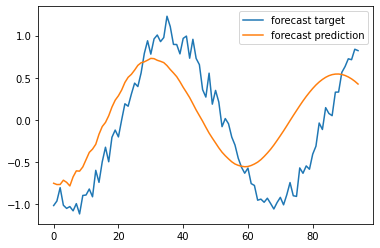

In [9]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()